In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("automaton")
from automaton.tournament import Tournament

In [2]:
def payoff(a, b):
    if int(a+b) == 2:
        return 3, 3
    elif int(a+b) == -2:
        return 1, 1
    elif a > b:
        return 0, 5
    elif a < b:
        return 5, 0


In [4]:
tournament = Tournament(2**7, 200, payoff)
results = tournament.compete()

100%|██████████| 128/128 [02:44<00:00,  1.29s/it]


In [20]:
data = np.delete(results, [2,3], axis=1).astype(int)
adjacency1 = np.zeros((int(np.sqrt(len(data))),int(np.sqrt(len(data)))))
adjacency2 = adjacency1.copy()
adjacency1[data[:,0], data[:,1]] = data[:,2]
adjacency2[data[:,0], data[:,1]] = data[:,3]
avg_scores = adjacency1.mean(axis=1)

### Adjacency score matrix
The adjacency score matrix shows the score of **agent a** (given by its integer index) when it competed against **agent b**. The score is calculated by the payoff function. To recover the bit string of the agent, use the function `get_bits` in the cell below. 

In [ ]:
def get_bits(n, results=results):
    return results[results[:,0]==str(n)][0, 2]

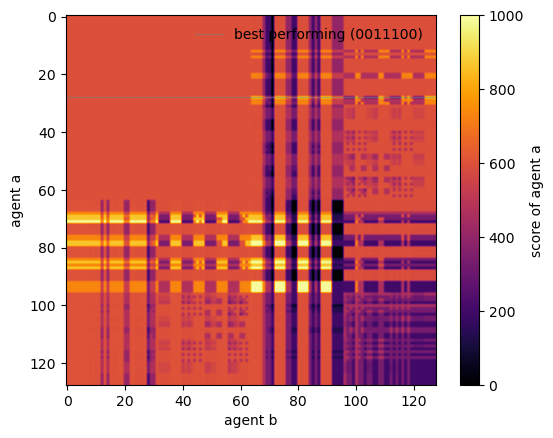

In [22]:
plt.figure()
plt.imshow(adjacency1, cmap="inferno")
plt.axhline(np.argmax(avg_scores), lw=1, alpha=0.5, color="gray", label=f"best performing ({get_bits(np.argmax(avg_scores))})")
plt.ylabel("agent a")
plt.xlabel("agent b")
plt.colorbar(label="score of agent a")
plt.legend(frameon=False)
plt.savefig("assets/prisoners_dilemma.png", dpi=3000)
plt.show()

### Average score plot
The plot below shows the average of the adjacency score matrix computed across agents b. in essence it represents the average score of the agents when playing against all other agents including themselves. The best agents are those with the highest average score.

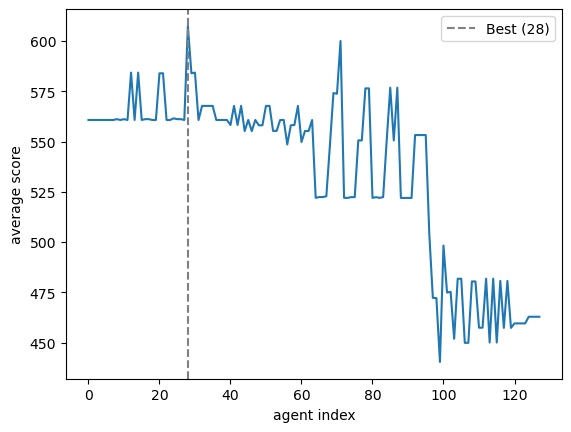

In [52]:
plt.figure()
plt.plot(avg_scores)
plt.axvline(np.argmax(avg_scores), c="gray", ls="--", label=f"Best ({np.argmax(avg_scores)})")
plt.xlabel("agent index")
plt.ylabel("average score")
plt.legend()
plt.show()    